In [1]:
import warnings
warnings.filterwarnings(action='ignore')
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC

In [2]:
#step1.selenium 패키지와 time 모듈 import
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time

In [4]:
# 크롬 드라이버로 원하는 url 접속
# 1. 크롬 브라우저 실행
driver = webdriver.Chrome('../chromedriver/chromedriver.exe')

In [8]:
# 2. 특정 url: https://shopping.naver.com/home/p/index.naver 페이지로 연결
title_list = []
price_list = []
img_list = []
for i in range(2):
    print('---------------', i , '-------------')
    url = 'http://stores.auction.co.kr/modaoutlet/List?Category=66000000&CategoryType=General&SortType=AuctionRank&DisplayType=SmallImage&Page='+str(i)+'&PageIndex=&PageSize=60&IsFreeShipping=False&Is3PL=False&MinPrice=0&MaxPrice=0'
    driver.get(url) # http 요청을 보내라! <----- http 응답을 보낼 것임!
    time.sleep(20)
    
    prod_title = driver.find_elements_by_css_selector('div > p.prd_name > a')

    for title in prod_title:
        title_list.append(title.text)
    
    prod_price = driver.find_elements_by_css_selector('div > p.prd_price > em > strong')

    for price in prod_price:
        price_list.append(price.text)
    
    prod_img = driver.find_elements_by_css_selector('img.lazy')

    for img in prod_img:
        img_list.append(img.get_attribute('src'))
    print(len(img_list), len(price_list), len(title_list))
    driver.execute_script("window.scrollTo("+str(i)+", document.body.scrollHeight)")
print('--', len(title_list))
print('--', len(price_list))
print('--', len(img_list))

--------------- 0 -------------
60 60 60
--------------- 1 -------------
120 120 120
-- 120
-- 120
-- 120


In [9]:
#ItemList > div.prod_list > ul > li:nth-child(8) > p > a > img

In [17]:
import pandas as pd

In [18]:
moda_prod = pd.DataFrame({'title' : title_list,
                           'url' : price_list,
                           'img' : img_list
                           })
moda_prod

,title,url,img
0,올포유 모다아울렛 가을 여성 체크패턴 점퍼 AWJUI7308,"115,000원",http://image.auction.co.kr/itemimage/1f/8f/41/...
1,[꼼빠니아] 꼼빠니아 모다아울렛 테일러드 카라의 트렌치 코트 -CAAS2-WCH50...,"77,350원",http://image.auction.co.kr/itemimage/20/31/b0/...
2,[베네통] 베네통 모다아울렛 베네통 트위드 롱 가디건 BAKC02011,"149,700원",http://image.auction.co.kr/itemimage/26/06/c4/...
3,[꼼빠니아] 꼼빠니아 모다아울렛 테일러드 카라의 실크 트렌치 코트 -CAAS2-WC...,"77,350원",http://image.auction.co.kr/itemimage/20/31/b0/...
4,제시뉴욕 모다아울렛 랩롱원피스BA65NLOQ1400,"75,840원",http://image.auction.co.kr/itemimage/1d/33/16/...
...,...,...,...
115,[ab.f.z] 에이비에프지 모다아울렛 (겨울신상)AFU4GC 헤링본 모직 코트,"113,520원",http://pics.auction.co.kr/common/blank.gif
116,트리아나 모다아울렛 니트후드반코트AE4GA02q,"51,600원",http://pics.auction.co.kr/common/blank.gif
117,트리아나 모다아울렛 무스탕q,"257,140원",http://pics.auction.co.kr/common/blank.gif
118,[ab.f.z] 에이비에프지 모다아울렛 AFU1GS H라인 정장 스커트,"52,360원",http://pics.auction.co.kr/common/blank.gif


In [19]:
moda_prod['img'][1]

'http://image.auction.co.kr/itemimage/20/31/b0/2031b09403.jpg'

In [20]:
moda_prod['img'][5]

'http://image.auction.co.kr/itemimage/1d/f9/ff/1df9ffcbd3.jpg'

In [21]:
path_folder = './moda_img/' # path_folder = './': 현재 경로(폴더)
import os
if not os.path.isdir(path_folder):
    os.mkdir(path_folder)

In [22]:
from urllib.request import urlretrieve

In [16]:
i = 0
for img in img_list:
    i += 1 # i = i + 1
    print(i, '> ', img.find('.jpg'))
    if img.find('.jpg') != -1:
        urlretrieve(img, path_folder + str(i) + '.jpg')
    else:
        urlretrieve(img, path_folder + str(i) + '.gif')

1 >  56
2 >  56
3 >  56
4 >  56
5 >  56
6 >  56
7 >  -1
8 >  -1
9 >  -1
10 >  -1
11 >  -1
12 >  -1
13 >  -1
14 >  -1
15 >  -1
16 >  -1
17 >  -1
18 >  -1
19 >  -1
20 >  -1
21 >  -1
22 >  -1
23 >  -1
24 >  -1
25 >  -1
26 >  -1
27 >  -1
28 >  -1
29 >  -1
30 >  -1
31 >  -1
32 >  -1
33 >  -1
34 >  -1
35 >  -1
36 >  -1
37 >  -1
38 >  -1
39 >  -1
40 >  -1
41 >  -1
42 >  -1
43 >  -1
44 >  -1
45 >  -1
46 >  -1
47 >  -1
48 >  -1
49 >  -1
50 >  -1
51 >  -1
52 >  -1
53 >  -1
54 >  -1
55 >  -1
56 >  -1
57 >  -1
58 >  -1
59 >  -1
60 >  -1
61 >  56
62 >  56
63 >  56
64 >  -1
65 >  -1
66 >  -1
67 >  -1
68 >  -1
69 >  -1
70 >  -1
71 >  -1
72 >  -1
73 >  -1
74 >  -1
75 >  -1
76 >  -1
77 >  -1
78 >  -1
79 >  -1
80 >  -1
81 >  -1
82 >  -1
83 >  -1
84 >  -1
85 >  -1
86 >  -1
87 >  -1
88 >  -1
89 >  -1
90 >  -1
91 >  -1
92 >  -1
93 >  -1
94 >  -1
95 >  -1
96 >  -1
97 >  -1
98 >  -1
99 >  -1
100 >  -1
101 >  -1
102 >  -1
103 >  -1
104 >  -1
105 >  -1
106 >  -1
107 >  -1
108 >  -1
109 >  -1
110 >  -1
111 >  -

In [17]:
from IPython.display import Image

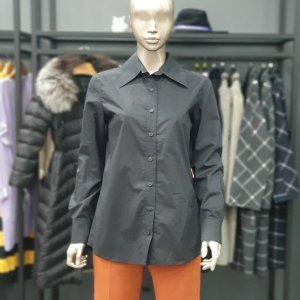

In [20]:
Image('./moda_img/6.jpg')